In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [51]:
import numpy as np
import pandas as pd
import random as rd
data = pd.read_csv("drive/My Drive/clean_tweet.csv",index_col=0)
data.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,tweet_text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [52]:
data[data.isnull().any(axis=1)].head()


,tweet_text,target
208,NaN,0
249,NaN,0
282,NaN,0
398,NaN,0
430,NaN,0


In [53]:
data.dropna(inplace=True) #NAN values are coming from just @username, delete them 
data.reset_index(drop=True,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596041 entries, 0 to 1596040
Data columns (total 2 columns):
tweet_text    1596041 non-null object
target        1596041 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [0]:
# x = data.tweet_text
# y = data.target

In [54]:
data

,tweet_text,target
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0
...,...,...
1596036,just woke up having no school is the best feel...,4
1596037,thewdb com very cool to hear old walt interviews,4
1596038,are you ready for your mojo makeover ask me fo...,4
1596039,happy th birthday to my boo of alll time tupac...,4


In [0]:
# x_train = data['tweet_text'].sample(frac=.90, random_state=2000)
# y_train = data['target'].sample(frac=.90, random_state=2000)

X = []
sentences = list(data['tweet_text'])
for sen in sentences:
    X.append(sen)

In [0]:
# x_train
#X

In [143]:
# y_train

y = data['target']

#1 == positive, 0 == negative
y = np.array(list(map(lambda x: 0 if x==0 else 1, y)))
y[1000000]

1

In [144]:
# remaining_set = data.loc[~data['tweet_text'].index.isin(x_train.index), :]
# remaining_set #no overlap
print(data.loc[[1000000]])


                                                tweet_text  target
1000000  flylady with you on ironing just going to hang...       4


In [0]:
# x_validation = remaining_set['tweet_text'].sample(frac=1, random_state=2000)
# x_validation
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [160]:
# y_validation = remaining_set['target'].sample(frac=1, random_state=2000)
# y_validation

# len(y_train)
len(y_train)

1276832

In [0]:
# print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
#                                                                              (len(x_train[y_train == 0]) / (len(x_train)*1.))*100,
#                                                                             (len(x_train[y_train == 4]) / (len(x_train)*1.))*100))
# print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),
#                                                                              (len(x_validation[y_validation == 0]) / (len(x_validation)*1.))*100,
#                                                                             (len(x_validation[y_validation == 4]) / (len(x_validation)*1.))*100))
# # print("Test set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_test),
# #                                                                              (len(x_test[y_test == 0]) / (len(x_test)*1.))*100,
# #                                                                             (len(x_test[y_test == 4]) / (len(x_test)*1.))*100))






In [0]:
# test = pd.read_csv("drive/My Drive/testdata.csv", sep=",", header = None)
# test

In [0]:
# x_test = test[5]
# x_test

In [0]:
# y_test = test[0]
# y_test

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [165]:
len(y_train)


1276832

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [170]:
len(y_train)


1276832

In [0]:
vocab_size = len(tokenizer.word_index) + 1
# vocab_size

maxlen = 50

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)





In [172]:
len(X_train)

1276832

In [176]:
len(X_train)

1276832

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('drive/My Drive/glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [0]:
embedding_matrix = zeros((vocab_size, 200))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

import keras
from keras.layers.convolutional import Conv1D
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv1D, GlobalMaxPooling1D

from keras.optimizers import SGD


model = Sequential()

embedding_layer = Embedding(vocab_size, 200, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [178]:
print(model.summary())


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 50, 200)           46302600  
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 46, 128)           128128    
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 46,430,857
Trainable params: 128,257
Non-trainable params: 46,302,600
_________________________________________________________________
None


In [188]:
y_test


array([0, 0, 0, ..., 0, 1, 0])

In [183]:
len(y_test)

319209

In [184]:
X_train

array([[  78,    8, 1492, ...,    0,    0,    0],
       [  43,  194,    6, ...,    0,    0,    0],
       [4687,   59,   17, ...,    0,    0,    0],
       ...,
       [ 215,   73,   17, ...,    0,    0,    0],
       [  56,   23, 1625, ...,    0,    0,    0],
       [ 121,  193,  131, ...,    0,    0,    0]], dtype=int32)

In [186]:
len(X_train)
type(X_train)

numpy.ndarray

In [179]:
history = model.fit(X_train, y_train, batch_size=64, epochs=6, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Train on 1021465 samples, validate on 255367 samples
Epoch 1/6
1021465/1021465 [==============================] - 70s 69us/step - loss: 0.4648 - acc: 0.7797 - val_loss: 0.4454 - val_acc: 0.7931
Epoch 2/6
1021465/1021465 [==============================] - 69s 68us/step - loss: 0.4324 - acc: 0.8001 - val_loss: 0.4345 - val_acc: 0.7987
Epoch 3/6
1021465/1021465 [==============================] - 68s 67us/step - loss: 0.4178 - acc: 0.8088 - val_loss: 0.4332 - val_acc: 0.7992
Epoch 4/6
1021465/1021465 [==============================] - 68s 67us/step - loss: 0.4080 - acc: 0.8141 - val_loss: 0.4409 - val_acc: 0.7950
Epoch 5/6
1021465/1021465 [==============================] - 69s 67us/step - loss: 0.4000 - acc: 0.8189 - val_loss: 0.4368 - val_acc: 0.7977
Epoch 6/6
319209/319209 [==============================] - 13s 40us/step


In [180]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.4357965620420442
Test Accuracy: 0.7998020105951261


In [50]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: -17.28510058835807
Test Accuracy: 0.12650602412630754


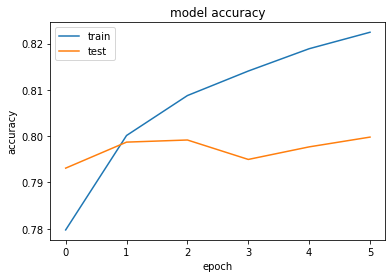

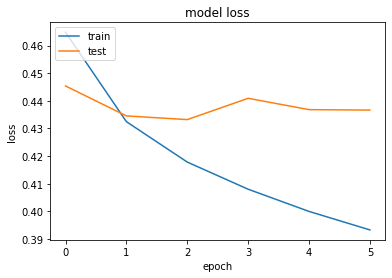

In [189]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()